# Efetuando treino e teste do PerceptronMMQ utilizando o dataset Two Moon

In [5]:
import pandas as pd
from datasets import load_two_moon

bunch = load_two_moon()
nd_X, nd_y = bunch.data, bunch.target
X = pd.DataFrame(nd_X)
y = pd.Series(nd_y, name='y').replace([0, 1], [-1, 1])

X.head()

,0,1
0,1.874676,0.015293
1,-0.874676,0.484707
2,0.992009,0.126170
3,1.973225,0.270144
4,-0.240103,0.970747


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
from sklearn.preprocessing import StandardScaler

X_train_scaler = StandardScaler().fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train.columns) # convertendo para DF

In [14]:
from perceptronmmq.perceptronmmq import PerceptronMMQ

cls_perceptronmmq = PerceptronMMQ(activation_function='sign')
cls_perceptronmmq.fit(X_train, y_train)
print(cls_perceptronmmq.score(X_train, y_train))
print(cls_perceptronmmq.score(X_test, y_test))

0.8833333333333333
0.9


In [15]:
from sklearn.metrics import confusion_matrix

y_pred = [
    cls_perceptronmmq.predict(x)
    for x in X_test.values
]

conf_matrix = confusion_matrix(y_test, y_pred)
''' 
vn = verdadeiros negativos, fp = falsos positivos, 
fn = falsos negativos, vp = verdadeiros positivos

[[vn, fp],
 [fn, vp]]
'''
conf_matrix

array([[27,  2],
       [ 4, 27]])

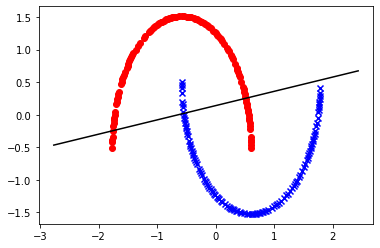

In [17]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

data = X_train_scaler[:][:].values
percetrons_weights = cls_perceptronmmq.get_weight()

x_ax = np.arange(data[: ,0].min()-1, data[: ,1].max()+1, 0.1)
w1 = percetrons_weights[0]
w2 = percetrons_weights[1]
b = percetrons_weights[2]
plt.plot(x_ax, -w1*x_ax/w2 + b/w2, color='black')

menosum = np.where(y_train == -1)
um = np.where(y_train == 1)
plt.scatter(data[menosum, 0], data[menosum, 1],
            color='red', marker='o', label='menosum')
plt.scatter(data[um, 0], data[um, 1],
            color='blue', marker='x', label='um')

plt.show()